<a href="https://colab.research.google.com/github/guptaayushi22/MPM_200_Gupta/blob/main/MPM200_Session5_HW_AGupta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

In [51]:
install.packages('beepr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [52]:
library(beepr)

In [53]:
?beep()

Warning message in fetch(key):
“internal error 1 in R_decompress1 with libdeflate”
ERROR while rich displaying an object: Error in fetch(key): lazy-load database '/usr/local/lib/R/site-library/beepr/help/beepr.rdb' is corrupt

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2re

In [54]:
beep("mario") ##no sound is produced as audio drivers are not available in this version of collab

Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

In [55]:
install.packages(c("tidyverse", "dplyr","ggplot2", "sjPlot" ))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [56]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(sjPlot)

## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [57]:
#read the csv file and
data = read.csv ('/content/Hummingbird_data.csv')

In [58]:
ls ()

[1] "data"        "data_types"  "model_data"  "p"           "rehab"      
[6] "table_Age_e" "table_F_Aid" "table_Sex_e"

In [59]:
head(data)

,Admitted,Disposition_binary,Place,F_Aid,Species_e,Sex_e,Age_e,Brought_in_after,season,r,Green_Orange,ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,1/2/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,1,Winter,found on the ground,Non-selasphorus spp.,1_ANHU
2,1/2/1991,Released,Lindsey,Yes,ANHU,Female-like,adult-like,0,Winter,unknown,Non-selasphorus spp.,2_ANHU
3,1/4/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,suspect torpor-like state,Non-selasphorus spp.,3_ANHU
4,1/5/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,4,Winter,unknown,Non-selasphorus spp.,4_ANHU
5,1/5/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,caught by domestic animal,Non-selasphorus spp.,5_ANHU
6,1/5/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,found on the ground,Non-selasphorus spp.,6_ANHU


**Q2. How many rows and columns are in the datafame**  
1 point

In [60]:
nrow(data)

[1] 6908

In [61]:
ncol(data)

[1] 12

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [62]:
str(data)


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [63]:
?sapply

In [64]:
# Identify data types of each column
data_types = sapply(data, class)
print(data_types)

          Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


In [65]:
## Data types for some variables are incorrectly labelled as character
## Admitted variable should be date
## variables like Disposition_binary, Place, F_aid, Species_e, Sex_e, Age_e, Season, Green_Orange are categorical and should be stored as Factors with levels


Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [66]:
library(dplyr)
model_data = sample_n(data, 5000)

**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

In [67]:
nrow (model_data)

[1] 5000

In [68]:
ncol(model_data)

[1] 12

In [69]:
## 5000 rows and 12 columns

In [70]:
str(model_data)

'data.frame':	5000 obs. of  12 variables:
 $ Admitted          : chr  "3/9/2007" "4/4/2013" "2/20/2014" "6/15/2013" ...
 $ Disposition_binary: chr  "Released" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "malibu" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "Yes" "No" "No" "No" ...
 $ Species_e         : chr  "Non-selasphorus" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "unknown" "Female-like " "Male" "Female-like " ...
 $ Age_e             : chr  "Nestling" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  0 1 0 0 0 0 0 0 0 3 ...
 $ season            : chr  "Spring" "Spring" "Winter" "Summer" ...
 $ r                 : chr  "found on the ground" "unknown" "found on the ground" "caught by domestic animal" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "3218_ANHU" "5927_ANHU" "4879_ANHU" "4760_ANHU" ...


**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

In [71]:
## 1 continuous variable and 11 categorical variables in this dataset

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [72]:
write.csv(model_data, "/content/Hummingbird_data_AYUSHI.csv")

In [73]:
getwd()

[1] "/content"

In [74]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [75]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4152
Santa Barbara,70
malibu,778


In [76]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [77]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

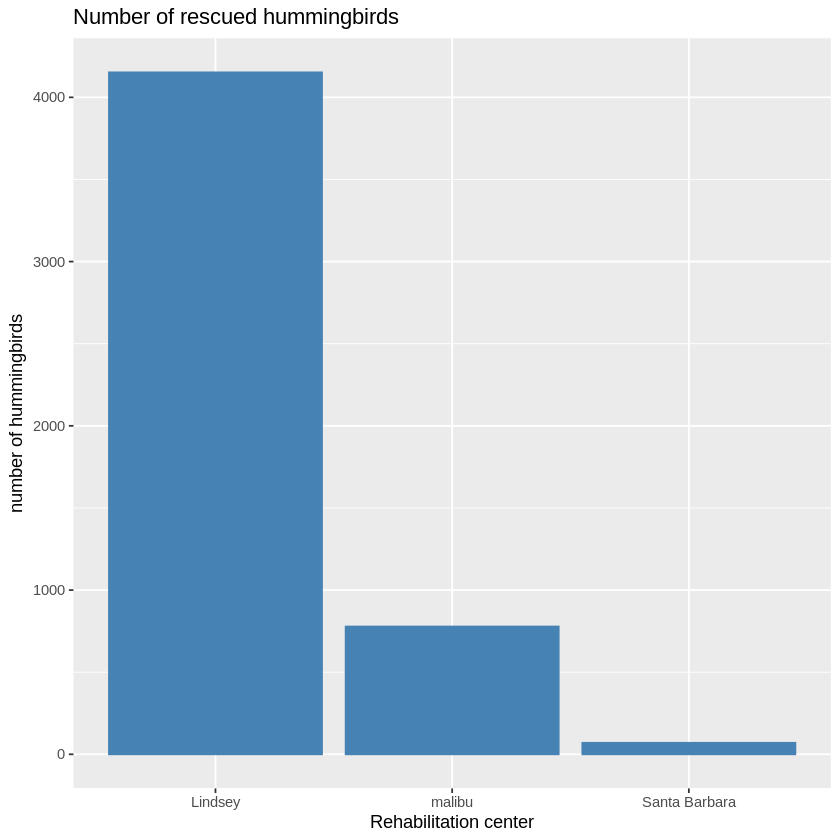

In [78]:
p

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

In [79]:
ggsave("plot.pdf", p, width = 4, height = 3, units = "in")

In [80]:
getwd()

[1] "/content"

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

In [81]:
## rehab = model_data  %>%
## group_by(Place)%>%
## summarise(count = n_distinct(ID))
## this code is creating a new data set "rehab" by taking data from original "model_data", grouping it by variable 'Place'.
## in each "place" the variable "ID" is counted and count for every distinct ID is summaried.

In [82]:
## p = ggplot(rehab, aes(x = Place, y = count)) +
## geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
## xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
## labs(title = "Number of rescued hummingbirds")
## plot 'p' is created for the dataset rehab using ggplot code, aes sets Place on x-axis and Count on y-axis
## a bar graph is plotted using geo_bar code and each bar (with steelblue border and color) represents the actual statistical value of the variable Count
## labels for x and y axes, and a title to the graph is added

In [83]:
## p
## graph is plotted
## ggsave("plot.pdf", p, width = 4, height = 3, units = "in")
## the graph is saved as a pdf named plot, with dimensions 4x3 inches
## getwd()
## to get the location of the saved graph

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

In [84]:
## 5 co-variates that affect survival: F_Aid, Sex_e, Age_e, season, Place

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

In [85]:
table_F_Aid = model_data  %>%
group_by(F_Aid, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'F_Aid'. You can override using the
`.groups` argument.


In [86]:
table_F_Aid

F_Aid,Disposition_binary,count
<chr>,<chr>,<int>
No,Died,2120
No,Released,1173
Yes,Died,1106
Yes,Released,601


In [87]:
table_Age_e = model_data  %>%
group_by(Age_e, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.


In [88]:
table_Age_e

Age_e,Disposition_binary,count
<chr>,<chr>,<int>
Nestling,Died,441
Nestling,Released,742
adult-like,Died,2785
adult-like,Released,1032


In [89]:
table_Sex_e = model_data  %>%
group_by(Sex_e, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Sex_e'. You can override using the
`.groups` argument.


In [90]:
table_Sex_e

Sex_e,Disposition_binary,count
<chr>,<chr>,<int>
Female-like,Died,2343
Female-like,Released,915
Male,Died,433
Male,Released,117
unknown,Died,450
unknown,Released,742


In [91]:
table_season = model_data  %>%
group_by(season, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


In [92]:
table_season

season,Disposition_binary,count
<chr>,<chr>,<int>
Fall,Died,375
Fall,Released,59
Spring,Died,1321
Spring,Released,938
Summer,Died,957
Summer,Released,595
Winter,Died,573
Winter,Released,182


In [93]:
table_Place = model_data  %>%
group_by(Place, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


In [94]:
table_Place

Place,Disposition_binary,count
<chr>,<chr>,<int>
Lindsey,Died,2703
Lindsey,Released,1449
Santa Barbara,Died,40
Santa Barbara,Released,30
malibu,Died,483
malibu,Released,295


In [95]:
p_F_Aid = ggplot(table_F_Aid, aes(x = F_Aid, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position ="dodge") +
  facet_grid(. ~ Disposition_binary) +
  coord_flip() +
  xlab("F_Aid") + ylab ("Number of Hummingbirds") + labs (title = "Number of hummingbirds by F_Aid and Disposition")

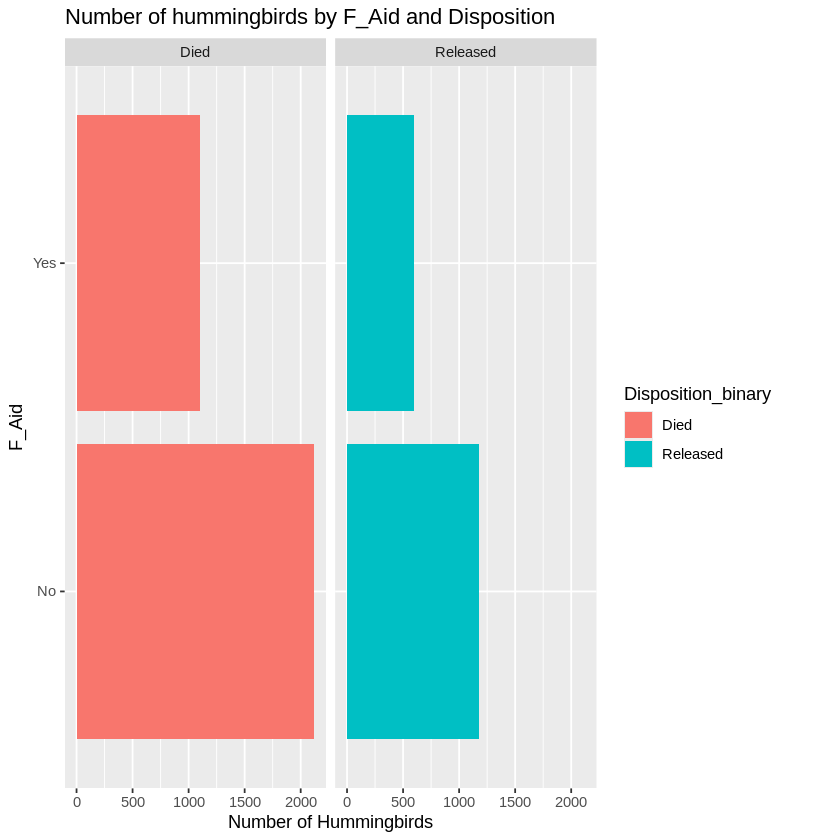

In [96]:
p_F_Aid

In [97]:
 p_Sex_e = ggplot(table_Sex_e, aes(x = Sex_e, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position ="dodge") +
  facet_grid(. ~ Disposition_binary) +
  coord_flip() +
  xlab("Sex_e") + ylab ("Number of Hummingbirds") + labs (title = "Number of hummingbirds by Sex_e and Disposition")

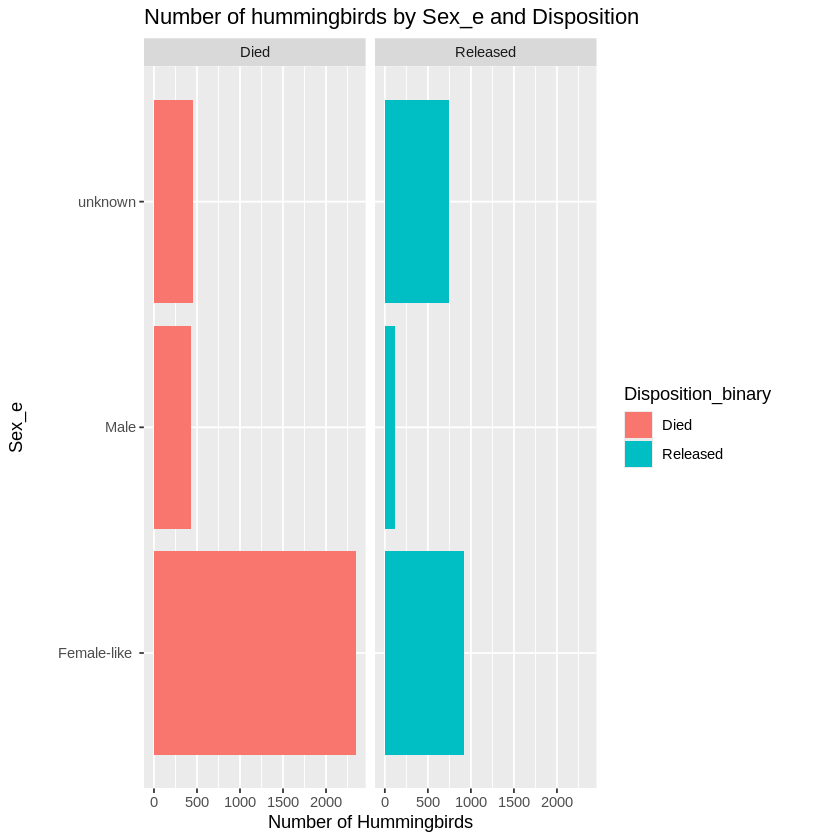

In [98]:
p_Sex_e

In [99]:
p_Age_e = ggplot(table_Age_e, aes(x = Age_e, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position ="dodge") +
  facet_grid(. ~ Disposition_binary) +
  coord_flip() +
  xlab("Age_e") + ylab ("Number of Hummingbirds") + labs (title = "Number of hummingbirds by Age_e and Disposition")

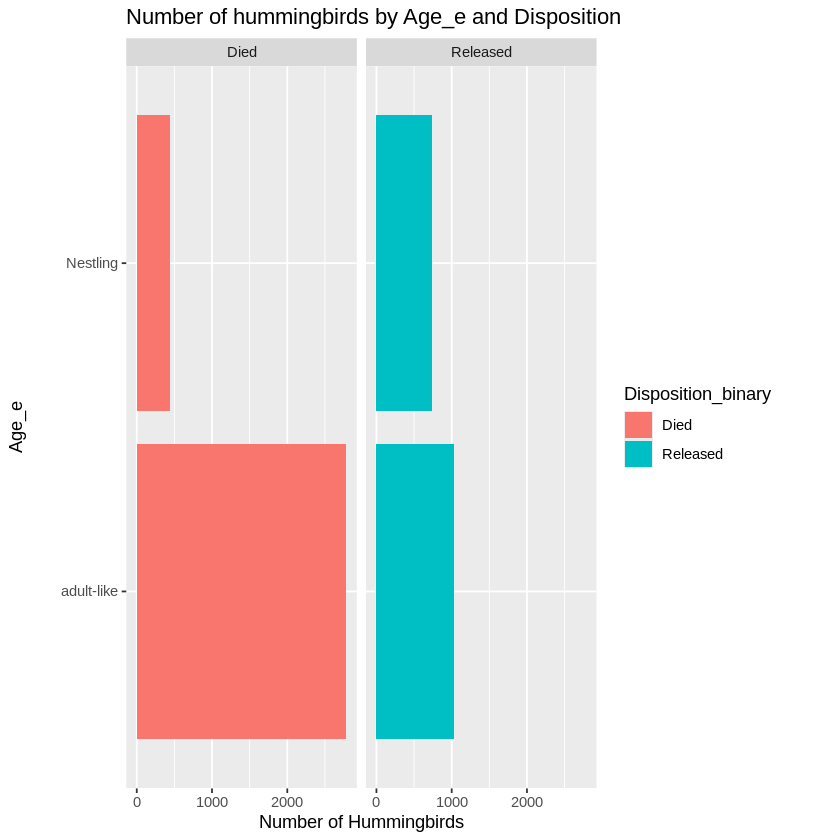

In [100]:
p_Age_e

In [101]:
p_Place = ggplot(table_Place, aes(x = Place, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position ="dodge") +
  facet_grid(. ~ Disposition_binary) +
  coord_flip() + xlab("Place") + ylab ("Number of Hummingbirds") + labs (title = "Number of hummingbirds by Place and Disposition")

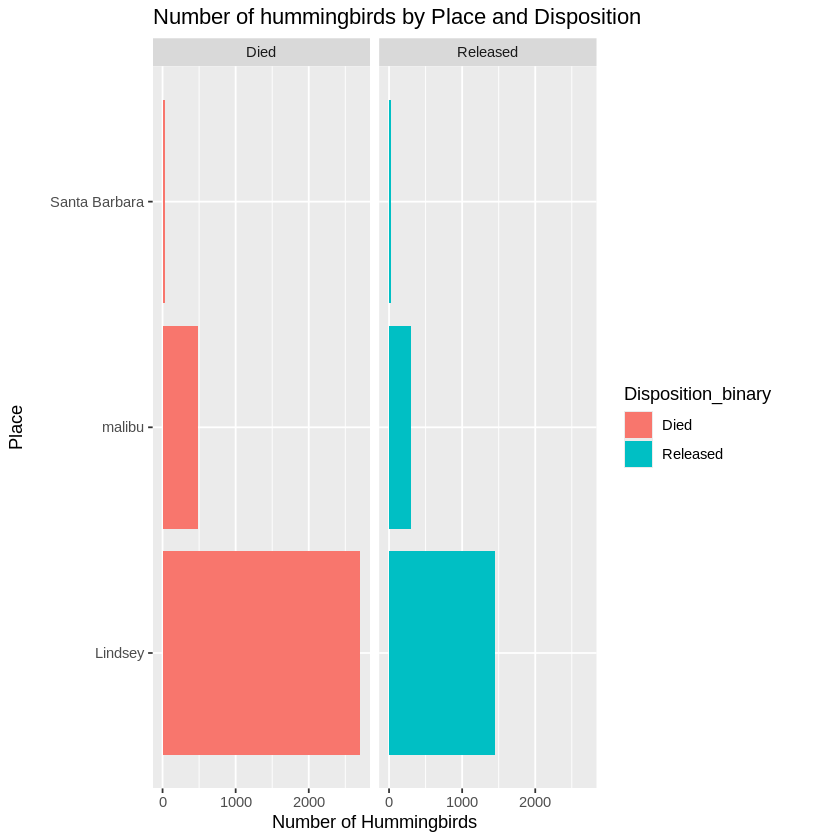

In [102]:
p_Place

In [103]:
p_season = ggplot(table_season, aes(x = season, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position ="dodge") +
  facet_grid(. ~ Disposition_binary) +
  coord_flip() +
  xlab("season") + ylab ("Number of Hummingbirds") + labs (title = "Number of hummingbirds by season and Disposition")

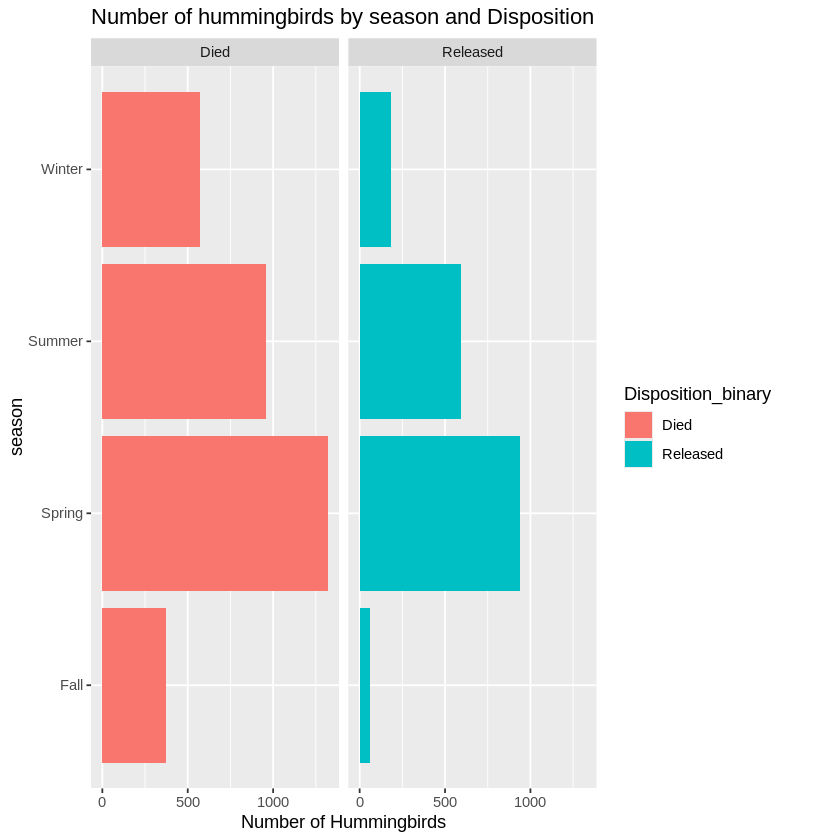

In [104]:
p_season

Analysis of the five variables (Age, Sex, First Aid, Place, Season) show that Age, Sex, and Season are likely associated with disposition.
Adults have a higher mortality than nestling/ younger hummingbirds.
Seasonal patterns can be seen, with more deaths in spring and least in fall. This pattern is also consistent for the released hummingbird data, further suggesting that the total intake cases is higher in some seasons than others.
Females have a higher number of deaths than males and unknown category.
The hummingbirds that did not recieve first aid have higher death rate than those who did. The release number is also higher for the birds without first aid, suggesting no association of first aid with the disposition.
The place of rehabilitaion also seems to be associated with the final disposition. Lindsey has the highest number of deaths and released bird, compared to Malibu and Santa Barbara. However, this association could be falsely estimated because of the diffrent number of intake cases at each rehabilitation centre.
To statistically test these associations, multivariate logistic regression and analysis can be done. This can help assess the combined effect of all covariates and determine which variable remains significant after controlling. Using ratios and proportions instead of number of dead and released for each level would give a better comparison. A chi-square test for each variable can be used to compare survival proportions across levels.


## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

In [105]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place,Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


In [106]:
# Plot the proportions
p_proportion = ggplot(proportions, aes(x = Place , y = proportion, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabilitation Center") +
  ylab("proportion of Hummingbirds") +
  labs(title = "Proportion of Hummingbirds released vs died by rehabilitation center")

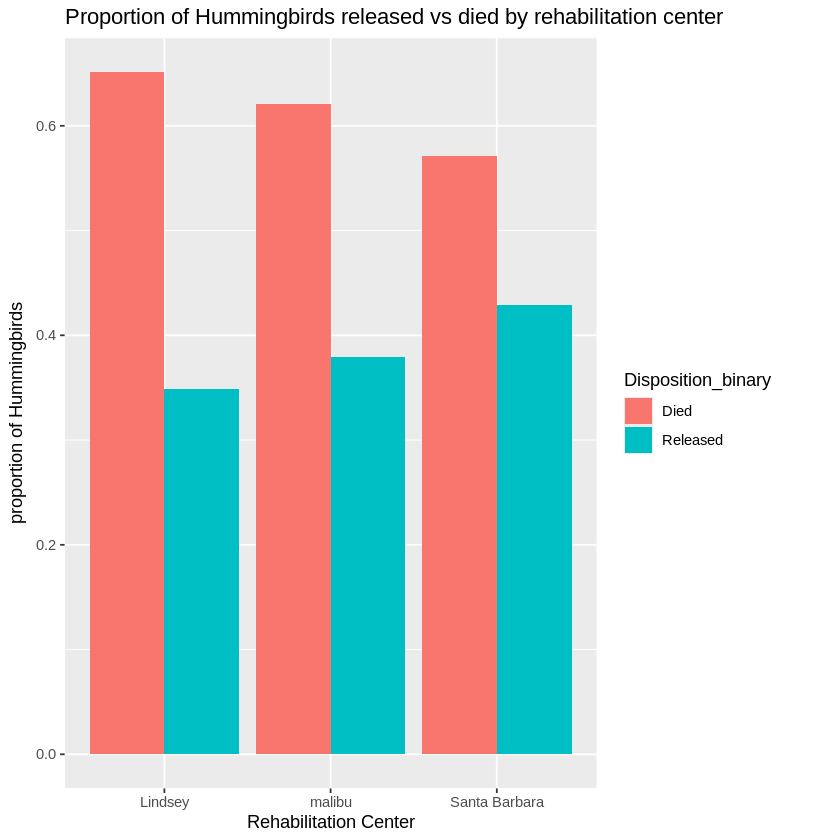

In [107]:
p_proportion

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

In [108]:
model_data$Species_group = ifelse(model_data$Species_e %in% c("ANHU", "BCHU", "Non-selasphorus"), "Non-Selasphorus",
                                  "Selasphorus")


In [109]:
table(model_data$Species_group)


Non-Selasphorus     Selasphorus 
           4129             871 

In [110]:
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

p_Species_group= ggplot(species_distribution, aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species Group") +
  ylab("Number of Hummingbirds") +
  labs(title = "Survival Rates Across Species Group" )

`summarise()` has grouped output by 'Species_group'. You can override using the
`.groups` argument.


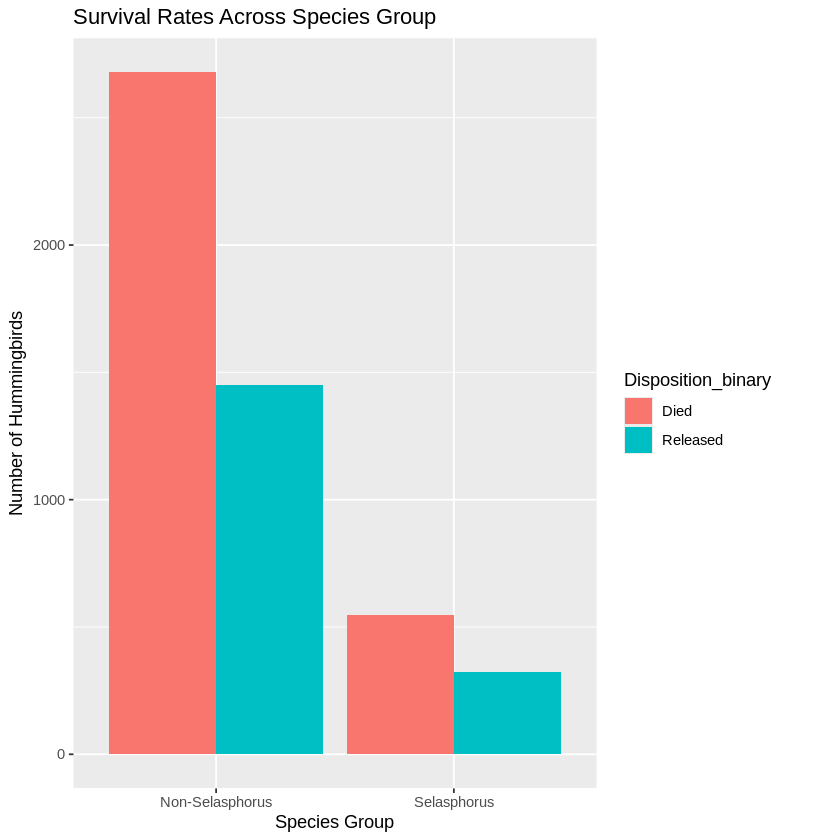

In [111]:
p_Species_group

In [112]:
## Analysis: From the graph we can see that Non-Selasphorus (with ANHU, BCHU, non-selasphorus) has higher count of deaths and released than Selasphorus, However the survival rates look approximately the same.

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [113]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")

Q12a Please explain the argument `format` in code above

In [114]:
## we formated the "Admitted" variable to the correct format as Date and created a new column "Admitted_Date" with format month/date/year in the model data

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [115]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))


In [116]:
admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))

Finally, we can use `ggplot` to plot these timelines.

In [117]:
p_month= ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Month") +
  ylab("Number of Hummingbirds") +
  labs(title = "Admissions by month" )

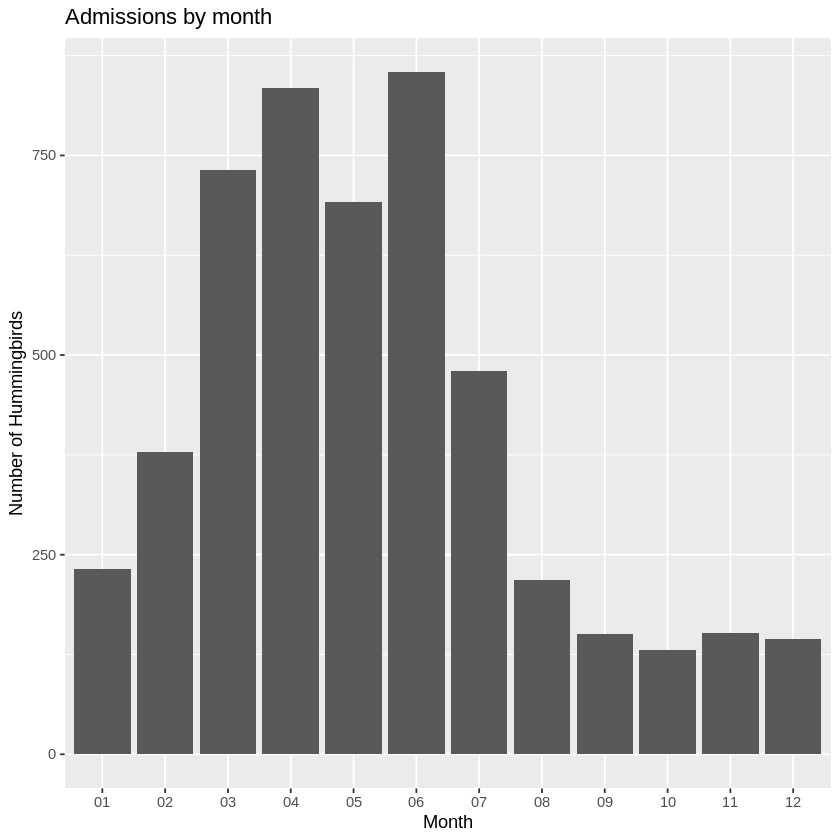

In [118]:
p_month

In [119]:
## Plot similar timeline for Yearly admissions of Hummingbirds

In [120]:
p_year= ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Year") +
  ylab("Number of Hummingbirds") +
  labs(title = "Admissions by Year" )

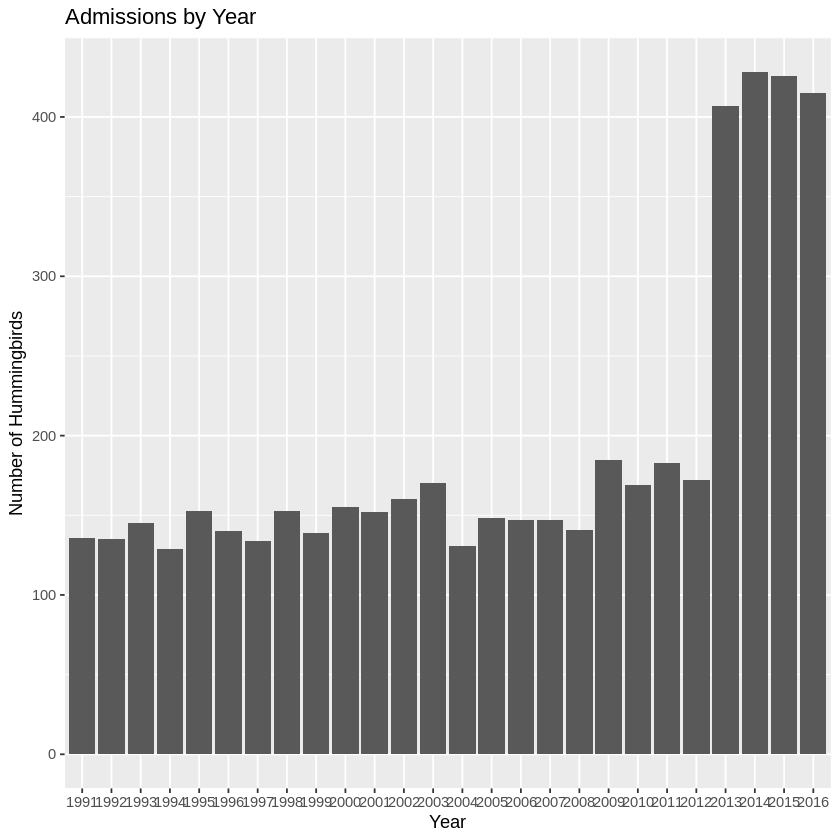

In [121]:
p_year

In [ ]:
##Session 8

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


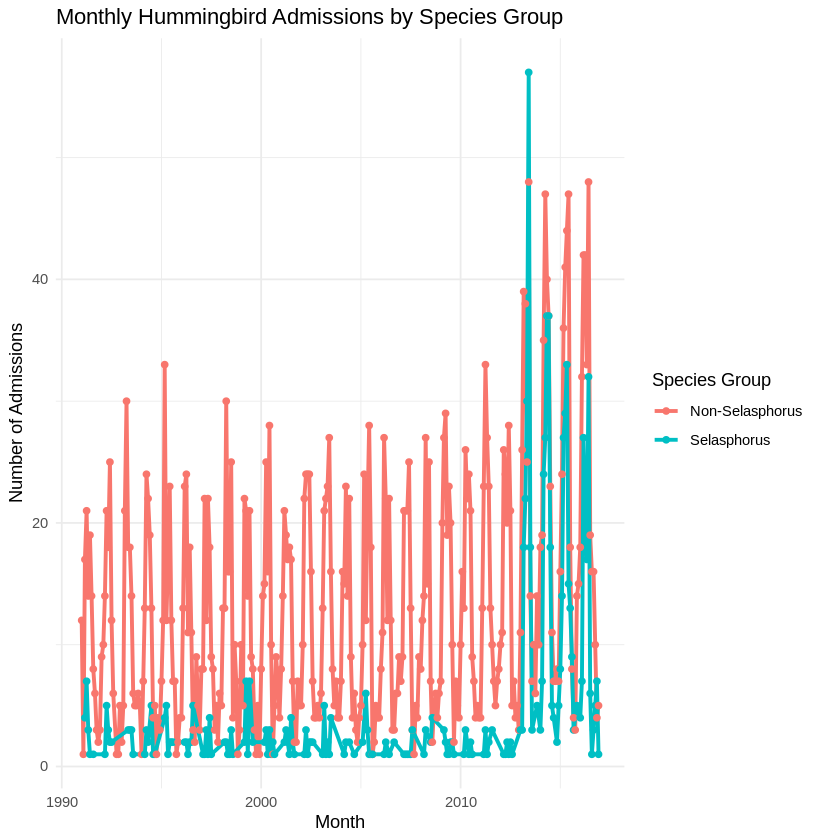

In [122]:
# Convert to date format (adjust column name if needed)
model_data = model_data %>%
  mutate(
    Admitted_date = as.Date(Admitted_date, format = "%m/%d/%Y"),
    Month = floor_date(Admitted_date, "month")   # Extract monthly period
  )

# Summarize monthly admissions by species group
monthly_admissions = model_data %>%
  group_by(Month, Species_group) %>%
  summarise(count = n(), .groups = "drop")

# Timeline plot
ggplot(monthly_admissions, aes(x = Month, y = count, color = Species_group)) +
  geom_line(size = 1.1) +
  geom_point() +
  labs(
    title = "Monthly Hummingbird Admissions by Species Group",
    x = "Month",
    y = "Number of Admissions",
    color = "Species Group"
  ) +
  theme_minimal()